In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
%reload_ext autoreload

Import libraries

In [30]:
from nn import nn, preprocess, io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import mean_squared_error

Load digits dataset

In [31]:
#Load digits dataset
digits = load_digits()

Split data into training and test sets using an 80/20 split where 20% is for validation and 80% is for training

In [32]:
#Split into test and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state = 0)
#Print shape
X_train.shape, X_test.shape

((1437, 64), (360, 64))

Construct autoencoder. Use mean squared error loss and relu because output is not binary (conts). Hyperparameters were chosen based on hyperparameter search using sklearn's ParameterGrid

In [33]:
#Instantiate neural network
nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
           {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}]

#hyperparameters
lr = .00001
seed = 42
batch_size = 10
epochs = 10
loss_function = "mse"

model = nn.NeuralNetwork(nn_arch, lr = 0.0001, seed = 42, batch_size = 50, epochs = 500, loss_function = "mse")

Train autoencoder

In [34]:
#Train autoencoder on the training data
train_loss, test_loss = model.fit(X_train, X_train, X_test, X_test)

Plot training loss and validation loss

average Training Error: 6.064917599905919
average Validation Error: 6.416368347717475


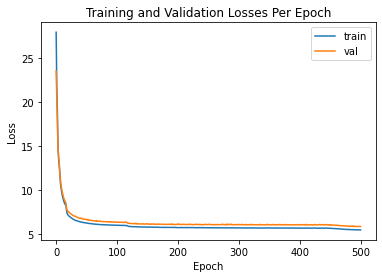

In [35]:
#Plot losses
plt.plot(train_loss, label="train")
plt.plot(test_loss, label="val")
plt.title("Training and Validation Losses Per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
print(f'average Training Error: {np.mean(train_loss)}')
print(f'average Validation Error: {np.mean(test_loss)}')

Quantify reconstruction error

Average prediction error: 5.884491004812239


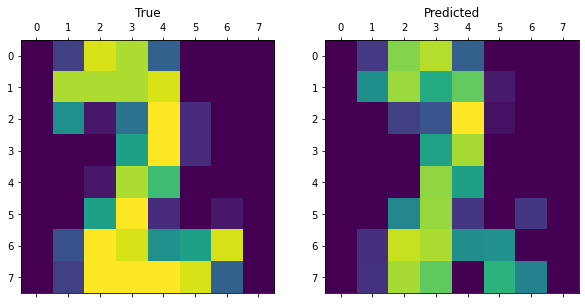

In [36]:
pred = model.predict(X_test)
pred_err = mean_squared_error(X_test, pred)
print("Average prediction error: " + str(pred_err))

fig, ax = plt.subplots(1, 2, figsize = (10, 10))
ax[0].matshow(X_test[10].reshape((8, 8)))
ax[0].set_title("True")
ax[1].matshow(pred[10].reshape((8, 8)))
ax[1].set_title("Predicted")
plt.show() 

Hyperparameter search using sklearn's ParameterGrid. Optimmized learning rate, batch size, and epochs

In [16]:
#hyperparameter turning
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state = 0)

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001, .0001, .00001],
    'batch_size': [10, 50, 100, 500],
    'epochs': [10, 50, 100, 500]
}

In [17]:
#init paramgrid
grid = ParameterGrid(param_grid)

In [26]:
results = {}

nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
           {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}]
loss_function = "mse"
seed = 42

for params in grid:
    model = nn.NeuralNetwork(nn_arch, 
                             params['learning_rate'], 
                             seed, 
                             params['batch_size'], 
                             params['epochs'], 
                             loss_function = 'mse')
    
    train_loss, val_loss = model.fit(X_train, X_train, X_test, X_test)
    pred = model.predict(X_test)
    pred_error = mean_squared_error(X_test, pred)
    
    results[str(params)] = pred_error
    
best_params = eval(min(results, key=results.get))

In [27]:
best_params

{'batch_size': 50, 'epochs': 500, 'learning_rate': 0.0001}